# **NETFLIX ANAYSIS**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as pyplot


In [ ]:
df=pd.read_csv("/content/archive (8).zip")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


***DESCRIPTIVE  ANALYSIS***

**NO OF TITLES**

In [ ]:
import pandas as pd
df=pd.read_csv("/content/archive (8).zip")
total_titles = len(df)
print("Total number of titles:", total_titles)



Total number of titles: 8807


In [ ]:
print(df['type'].unique())


['Movie' 'TV Show']


**TOTAL MOVIES AND SHOWS**

In [ ]:
df=pd.read_csv("/content/archive (8).zip")
Movie_count=df[df['type']=='Movie'].shape[0]
Tv_show_count=df[df['type']=='TV Show'].shape[0]
print("Total Movies:",Movie_count)
print("Total Tv show:",Tv_show_count)

Total Movies: 6131
Total Tv show: 2676


**TOP 5 MOST FREQUENTLY LISTED GENRES**

In [ ]:
import pandas as pd
from collections import Counter
df=pd.read_csv("/content/archive (8).zip")
all_genres =df['listed_in'].str.split(', ').sum()

top_genres=Counter(all_genres).most_common(5)
print("Top 5 most frequently listed genres:")
# The for loop has been corrected to unpack the tuples in 'top_genres'
# into 'genre' and 'count' variables.
for genre, count in top_genres:
   print(f"{genre}: {count} titles")

Top 5 most frequently listed genres:
International Movies: 2752 titles
Dramas: 2427 titles
Comedies: 1674 titles
International TV Shows: 1351 titles
Documentaries: 869 titles


**MISSING VALUES IN DIRECTOR,CAST AND COUNTRY COLUMNS**

In [ ]:
missing_values=df[['director','cast','country']].isna().sum()
print("missing values in each column:")
print(missing_values)

missing values in each column:
director    2634
cast         825
country      831
dtype: int64


**MOST COMMON RELEASE YEAR FOR CONTENT**

In [ ]:
most_common_year=df['release_year'].mode()[0]
print("Most common  release year for content:")
print(most_common_year)

Most common  release year for content:
2018


**TOP FIVE COUNTRIES CONTRIBUTING TO THE NETFLIX LIBRARY**

In [ ]:
top_countries=df['country'].value_counts().head(5)
print("Top five countries contributing to the netflix library:")
print(top_countries)

Top five countries contributing to the netflix library:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: count, dtype: int64


**TEN MOST RECENTLY ADDED TITLES**

In [ ]:
recent_titles=df.sort_values('date_added',ascending=False).head(10)
print("Ten most rrcently added titles:")
print(recent_titles[['title','date_added']]) # Use a list of column names

Ten most rrcently added titles:
                                         title         date_added
88    Blood Brothers: Malcolm X & Muhammad Ali  September 9, 2021
89                                 Mighty Raju  September 9, 2021
90                              Paradise Hills  September 9, 2021
91                  The Women and the Murderer  September 9, 2021
2034                      So Much Love to Give  September 9, 2020
2035                        The Social Dilemma  September 9, 2020
2032          Get Organized with The Home Edit  September 9, 2020
2031                                    Cuties  September 9, 2020
2030                                     Cargo  September 9, 2020
2033                 La Línea: Shadow of Narco  September 9, 2020


**DURATION DISTRIBUTION FOR MOVIES**

<ipython-input-20-f55138219741>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = pd.to_numeric(movies['duration'].str.replace(' min', ''), errors='coerce')


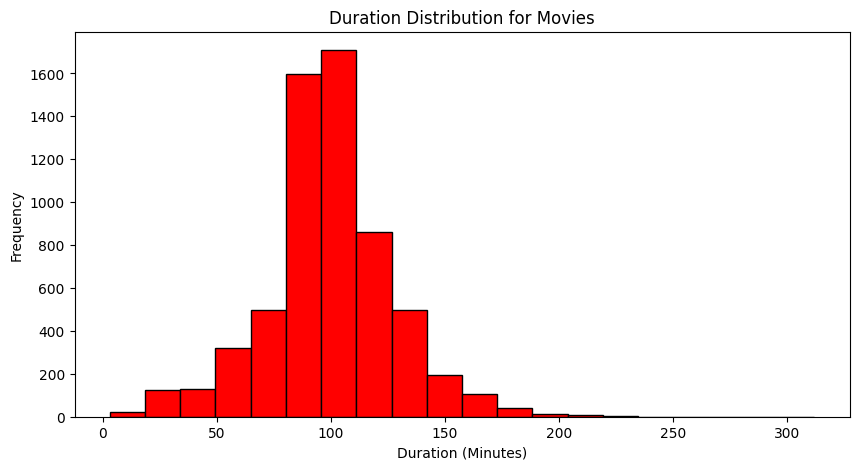

In [ ]:
import matplotlib.pyplot as plt
movies=df[df['type']=='Movie']
# Replace 'min' and convert to numeric, handling errors
movies['duration'] = pd.to_numeric(movies['duration'].str.replace(' min', ''), errors='coerce')
# Drop rows with NaN values in 'duration' column
movies = movies.dropna(subset=['duration'])
# Now convert to integers after handling NaNs
movies['duration'] = movies['duration'].astype(int)
plt.figure(figsize=(10,5))
plt.hist(movies['duration'], bins=20, color='red', edgecolor='black')
plt.title('Duration Distribution for Movies')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

**EARLIEST TITLE ADDED TO NETFLIX**

In [ ]:
earliest_title=df.sort_values('date_added',ascending=True).head(1)
print("Earliest title added to netflix:")
print(earliest_title[['title','date_added']])

Earliest title added to netflix:
                    title       date_added
8423  The Minimighty Kids   April 15, 2018


**GENRE APPEARING MOST FREQUENTLY**

In [ ]:
top_genre_combination=df['listed_in'].value_counts().head(1)
print("Genre appearing most frequently:")
print(top_genre_combination)

Genre appearing most frequently:
listed_in
Dramas, International Movies    362
Name: count, dtype: int64


***COMPARITIVE/BIVARIATE ANALYSIS***

**AVERAGE RELEASE YEARS FOR MOVIES AND TV SHOWS**

In [ ]:
import pandas as pd
df=pd.read_csv("/content/archive (8).zip")
df['release_year']=df['release_year']
avg_movies_year=df[df['type']=='Movie']['release_year'].mean()
avg_tvshow_year=df[df['type']=='TV Show']['release_year'].mean()
print(f"Average Release Year for Movies: {avg_movies_year:.2f}")
print(f"Average Release Year for TV Shows: {avg_tvshow_year:.2f}")


Average Release Year for Movies: 2013.12
Average Release Year for TV Shows: 2016.61


**RATINGS VARIATION BETWEEN MOVIES AND TV SHOWS**

In [ ]:
# Count the occurrences of each rating for Movies and TV Shows
rating_distribution = df.groupby('type')['rating'].value_counts().unstack()

# Display the distribution
print("Ratings Distribution Between Movies and TV Shows:")
print(rating_distribution)


Ratings Distribution Between Movies and TV Shows:
rating   66 min  74 min  84 min     G  NC-17    NR     PG  PG-13      R  \
type                                                                      
Movie       1.0     1.0     1.0  41.0    3.0  75.0  287.0  490.0  797.0   
TV Show     NaN     NaN     NaN   NaN    NaN   5.0    NaN    NaN    2.0   

rating    TV-14   TV-G   TV-MA  TV-PG   TV-Y  TV-Y7  TV-Y7-FV   UR  
type                                                                
Movie    1427.0  126.0  2062.0  540.0  131.0  139.0       5.0  3.0  
TV Show   733.0   94.0  1145.0  323.0  176.0  195.0       1.0  NaN  


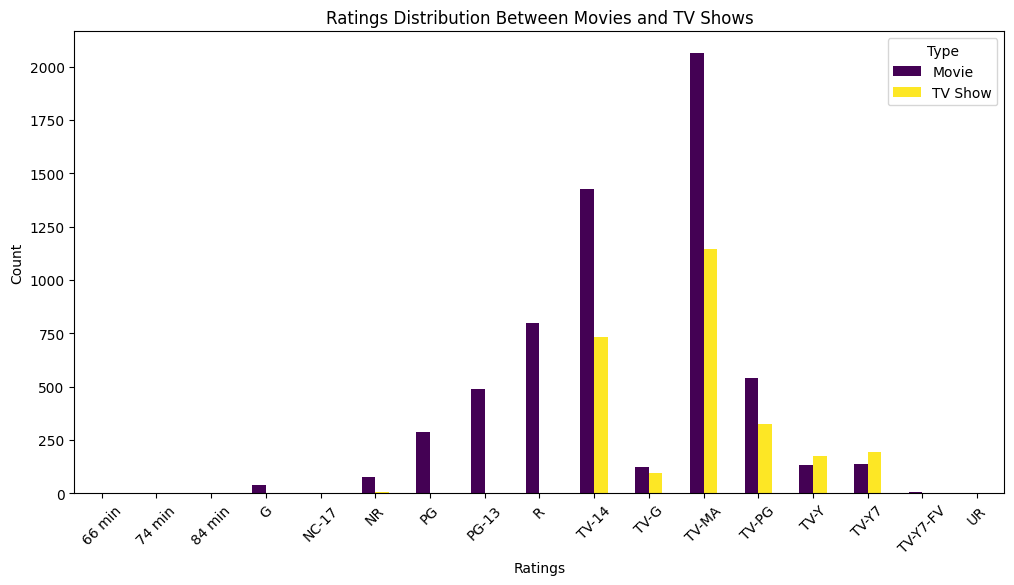

In [ ]:
import matplotlib.pyplot as plt

# Plot the rating distribution
rating_distribution.T.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Ratings Distribution Between Movies and TV Shows')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


**COUNTRY WITH THE HIGHEST COUNT OF INTERNATIONAL TV SHOWS**

In [ ]:
international_tv_shows = df[(df['type'] == 'TV Show') &
                                      (df['listed_in'].str.contains('International TV Shows', na=False))]

top_country = international_tv_shows['country'].value_counts().idxmax()

print("Country with the highest count of International TV Shows:", top_country)


Country with the highest count of International TV Shows: South Korea


**TREND ANALYSIS IN NETFLIX CONTENT ADDITIONS OVER TIME**

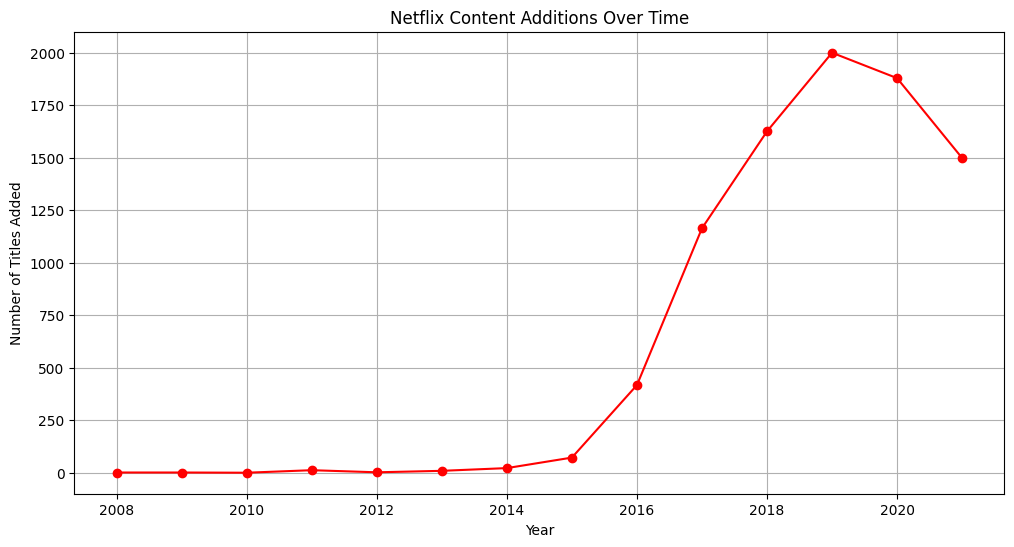

In [ ]:
import matplotlib.pyplot as plt

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['year_added'] = df['date_added'].dt.year

content_trend = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(content_trend.index, content_trend.values, marker='o', linestyle='-', color='red')
plt.title('Netflix Content Additions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()


**MOST POPULAR GENRES FOR AGE APPROPRIATE RATING**

In [ ]:

from collections import Counter
import pandas as pd


df['listed_in'] = df['listed_in'].astype(str)
df['genres'] = df['listed_in'].str.split(', ')
exploded_df = df.explode('genres')

genre_rating_count = exploded_df.groupby('rating')['genres'].value_counts()
top_genres_per_rating = genre_rating_count.groupby(level=0).head(3)
print("Most Popular Genres for Each Age-Appropriate Rating:")
print(top_genres_per_rating)


Most Popular Genres for Each Age-Appropriate Rating:
rating    genres                  
66 min    Movies                         1
74 min    Movies                         1
84 min    Movies                         1
G         Children & Family Movies      33
          Comedies                      11
          Classic Movies                 8
NC-17     Comedies                       2
          Independent Movies             2
          International Movies           2
NR        International Movies          34
          Dramas                        27
          Documentaries                 22
PG        Children & Family Movies     195
          Comedies                     148
          Dramas                        69
PG-13     Dramas                       192
          Comedies                     168
          Action & Adventure           148
R         Dramas                       375
          Action & Adventure           220
          Independent Movies           193
TV-14    

***MUTIVARIATE/INFERENTIAL ANALYSIS***

**TOP 3 COUNTRIES PRODUCING THE LONGEST DURATION CONTENT**

In [ ]:
import pandas as pd
df=pd.read_csv("/content/archive (8).zip")
# Filter out only movies
movies_df = df[df["type"] == "Movie"].copy()

# Extract numeric duration and convert to integer
movies_df["duration"] = movies_df["duration"].str.replace(" min", "", regex=True).astype(float)

# Split multiple countries into individual entries
movies_df_expanded = movies_df.assign(country=movies_df["country"].str.split(", ")).explode("country")

# Group by individual country and calculate the average movie duration
country_avg_duration = movies_df_expanded.groupby("country")["duration"].mean().dropna().sort_values(ascending=False)

# Get the top 3 countries with the longest average movie duration
top_3_countries = country_avg_duration.head(3)
print(top_3_countries)


country
Liechtenstein    200.000000
Montenegro       157.000000
Soviet Union     156.666667
Name: duration, dtype: float64


RELATIONSHIP BETWEEN CONTENT RATINGS AND THE DURATION OF MOVIES

<ipython-input-4-a8137e4ff2f3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="rating", y="duration", data=ratings_duration_df, showfliers=False, palette="coolwarm")


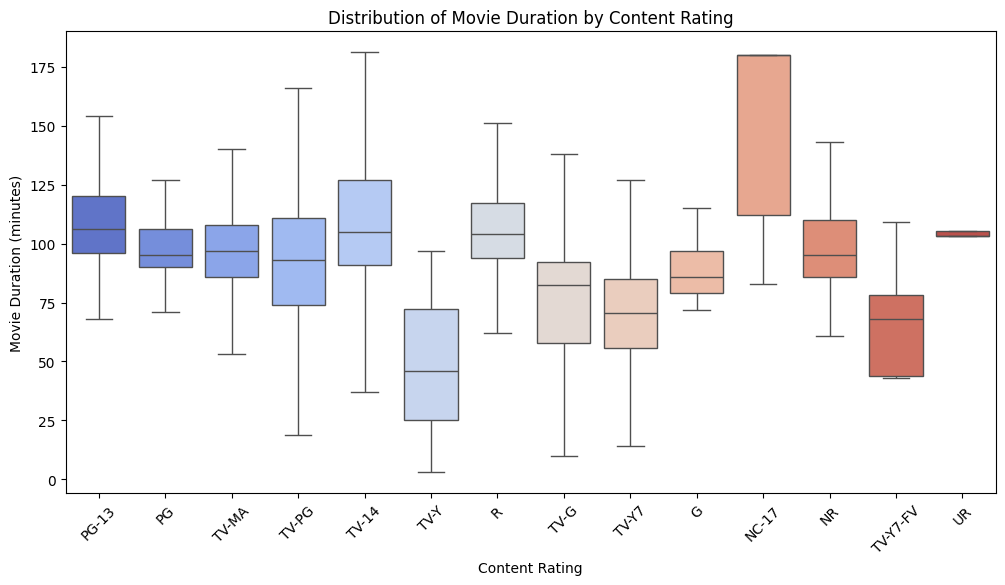

rating
NC-17       147.000000
PG-13       109.798440
TV-14       109.223798
R           107.480551
UR          105.500000
PG           98.585082
NR           97.638095
TV-MA        97.216848
TV-PG        92.910518
G            90.419355
TV-G         78.708333
TV-Y7        67.827160
TV-Y7-FV     66.285714
TV-Y         50.310811
Name: duration, dtype: float64

Correlation between content rating and movie duration:
                 rating_category  duration
rating_category         1.000000 -0.246771
duration               -0.246771  1.000000


<ipython-input-4-a8137e4ff2f3>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_duration_df["rating_category"] = ratings_duration_df["rating"].astype("category").cat.codes


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ratings_duration_df = movies_df_expanded.dropna(subset=["rating", "duration"])

plt.figure(figsize=(12, 6))
sns.boxplot(x="rating", y="duration", data=ratings_duration_df, showfliers=False, palette="coolwarm")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel("Content Rating")
plt.ylabel("Movie Duration (minutes)")
plt.title("Distribution of Movie Duration by Content Rating")

# Show the plot
plt.show()

# Calculate the average duration for each content rating
avg_duration_by_rating = ratings_duration_df.groupby("rating")["duration"].mean().sort_values(ascending=False)
print(avg_duration_by_rating)

# Check correlation between ratings (converted to numerical categories) and duration
ratings_duration_df["rating_category"] = ratings_duration_df["rating"].astype("category").cat.codes
correlation = ratings_duration_df[["rating_category", "duration"]].corr()

print("\nCorrelation between content rating and movie duration:")
print(correlation)


**GENRES STRONGLY CORRELATED WITH SPECIFIC COUNTRIES AND REGIONS**

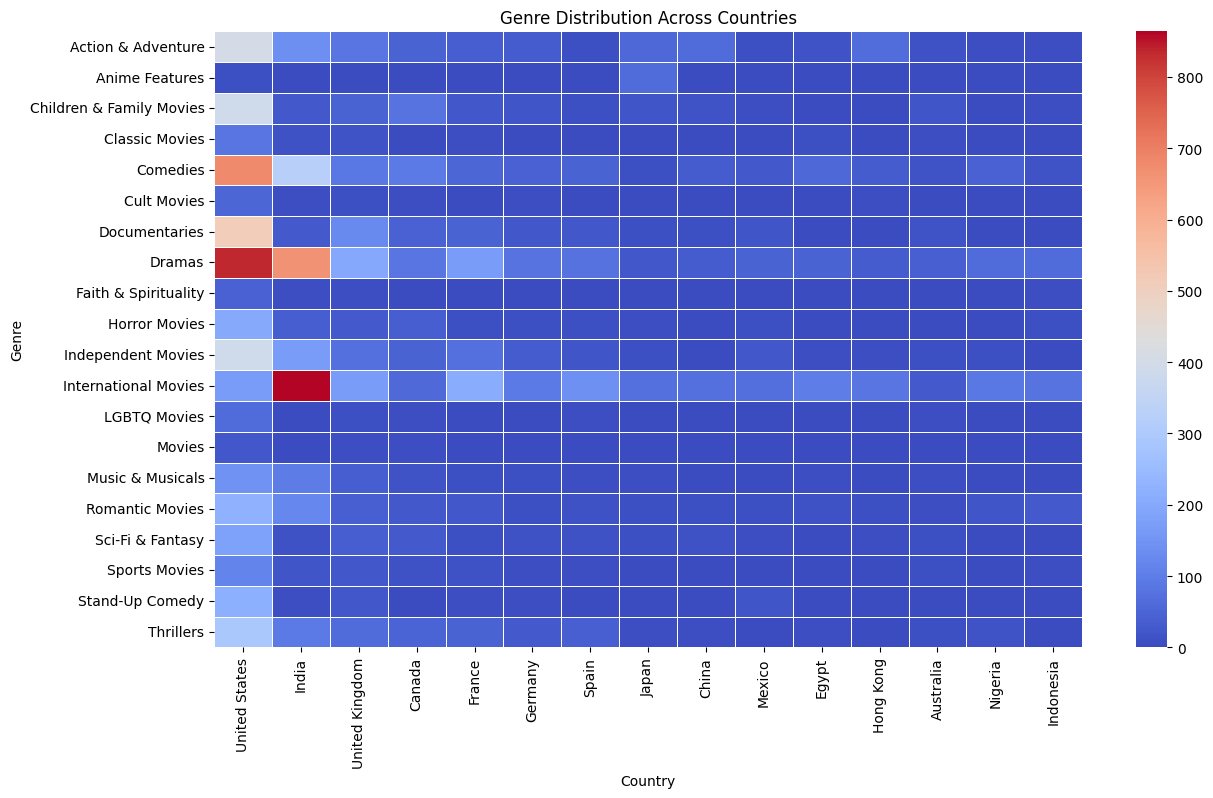

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

movies_df_expanded["genre"] = movies_df_expanded["listed_in"].str.split(", ")
movies_genre_expanded = movies_df_expanded.explode("genre")

genre_country_pivot = movies_genre_expanded.pivot_table(index="genre", columns="country", aggfunc="size", fill_value=0)

top_countries = movies_df_expanded["country"].value_counts().head(15).index
genre_country_pivot_filtered = genre_country_pivot[top_countries]

plt.figure(figsize=(14, 8))


sns.heatmap(genre_country_pivot_filtered, cmap="coolwarm", linewidths=0.5, annot=False)

plt.xlabel("Country")
plt.ylabel("Genre")
plt.title("Genre Distribution Across Countries")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'df' contains your original Netflix dataset
df = pd.read_csv("/content/archive (8).zip")  # Or the path to your dataset

# Filter out only movies
movies_df = df[df["type"] == "Movie"].copy()

# Extract numeric duration and convert to integer
movies_df["duration"] = movies_df["duration"].str.replace(" min", "", regex=True).astype(float)

# Split multiple countries into individual entries
movies_df_expanded = movies_df.assign(country=movies_df["country"].str.split(", ")).explode("country")

# Now continue with your code using 'movies_df_expanded'
# ... (rest of your code) ...

# Drop missing values in required columns
df_cleaned = movies_df_expanded.dropna(subset=["release_year", "country", "listed_in"])

# Use only the first genre for simplicity (single-label classification)
df_cleaned["genre"] = df_cleaned["listed_in"].str.split(", ").str[0]

# Encode country and genre as numerical labels
country_encoder = LabelEncoder()
df_cleaned["country_encoded"] = country_encoder.fit_transform(df_cleaned["country"])

genre_encoder = LabelEncoder()
df_cleaned["genre_encoded"] = genre_encoder.fit_transform(df_cleaned["genre"])

# Define features (release year & country) and target (genre)
X = df_cleaned[["release_year", "country_encoded"]]
y = df_cleaned["genre_encoded"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display results
print(f"Model Accuracy: {accuracy:.2f}")

# Decode predicted genre for a sample prediction
sample_index = 10
predicted_genre = genre_encoder.inverse_transform([y_pred[sample_index]])[0] # Corrected line
print(predicted_genre)

<ipython-input-3-4ff3797dc8cf>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["genre"] = df_cleaned["listed_in"].str.split(", ").str[0]
<ipython-input-3-4ff3797dc8cf>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["country_encoded"] = country_encoder.fit_transform(df_cleaned["country"])
<ipython-input-3-4ff3797dc8cf>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Model Accuracy: 0.27
Dramas


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**GENRE DIVERSITY ANALYSIS ACCROSS TOP COUNTRIES**

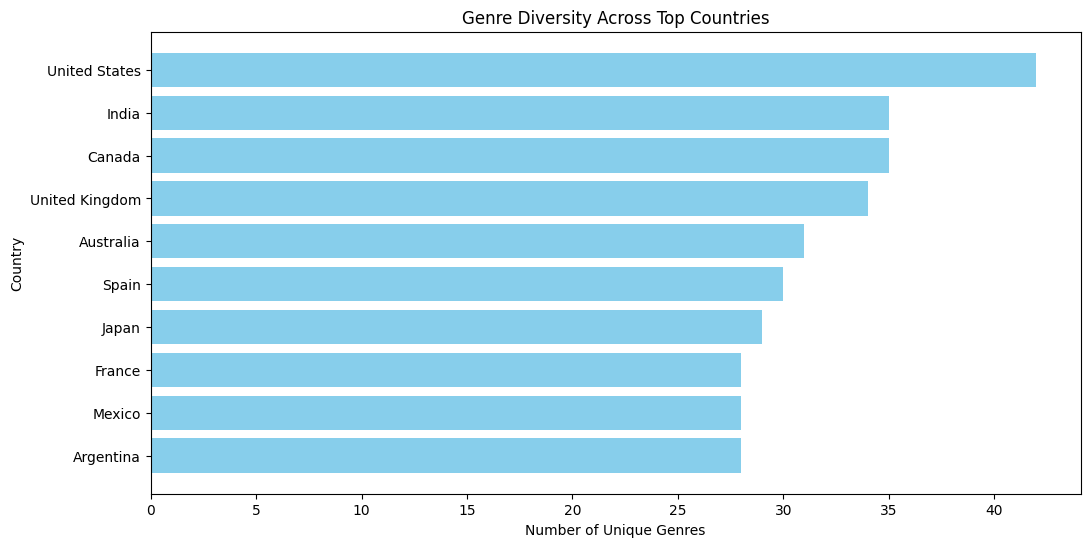

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/Netflix data analysis.zip"
df = pd.read_csv(file_path, encoding='latin1')


df = df.dropna(subset=['country', 'listed_in'])


df_exploded = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')


genre_counts = df_exploded.groupby('country')['listed_in'].nunique().reset_index()


top_countries = genre_counts.sort_values(by='listed_in', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_countries['country'], top_countries['listed_in'], color='skyblue')
plt.xlabel('Number of Unique Genres')
plt.ylabel('Country')
plt.title('Genre Diversity Across Top Countries')
plt.gca().invert_yaxis()
plt.show()
